<a href="https://colab.research.google.com/github/RajeswariPakki/Stock_Movement_Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Installing kaggle library
! pip install kaggle

In [4]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#API to fetch the dataset from kaggle.
!kaggle datasets download -d equinxx/stock-tweets-for-sentiment-analysis-and-prediction

Dataset URL: https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction
License(s): CC0-1.0
 45% 3.00M/6.59M [00:00<00:00, 5.50MB/s]
100% 6.59M/6.59M [00:00<00:00, 8.96MB/s]


In [6]:
#extracting the compressed file
from zipfile import ZipFile
dataset = '/content/stock-tweets-for-sentiment-analysis-and-prediction.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Loading the two files from the dataset.

In [10]:
import pandas as pd

# Load datasets
tweets = pd.read_csv("stock_tweets.csv")
stock_data = pd.read_csv("stock_yfinance_data.csv")

# Preview the datasets
print("Tweets Dataset:\n", tweets.head())
print("\nStock Data:\n", stock_data.head())

Tweets Dataset:
                         Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.  

Stock Data:
          Date        Open        High         Low       Close   Adj Close  \
0  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
1  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
2  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.5100

Performing Sentiment Analysis using TextBlob

In [53]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def analyze_sentiment(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity

# Apply sentiment analysis
tweets['sentiment_score'] = tweets['Tweet'].apply(analyze_sentiment)

# Categorize sentiment into Positive and Negative only
def categorize_sentiment(score):
    if score > 0:
        return "Positive"
    elif score <= 0:
        return "Negative"

tweets['sentiment'] = tweets['sentiment_score'].apply(categorize_sentiment)

# Preview the updated tweets dataset
print(tweets.head())


                        Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  \
0  Mainstream media has done an amazing job at br...       tsla  Tesla, Inc.   
1  Tesla delivery estimates are at around 364k fr...       tsla  Tesla, Inc.   
2  3/ Even if I include 63.0M unvested RSUs as of...       tsla  Tesla, Inc.   
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       tsla  Tesla, Inc.   
4  @RealDanODowd @Tesla Stop trying to kill kids,...       tsla  Tesla, Inc.   

   sentiment_score sentiment        date  \
0         0.600000  Positive  2022-09-29   
1         0.000000  Negative  2022-09-29   
2         0.018182  Positive  2022-09-29   
3         0.079167  Positive  2022-09-29   
4        -0.200000  Negative  2022-09-29   

                                       cleaned_tweet  
0  mai

Checking if the two datasets can be merged using 'Date' and 'Stock Name' columns

In [19]:
print(tweets['Date'].unique())
print(stock_data['Date'].unique())
print(tweets['Stock Name'].unique())
print(stock_data['Stock Name'].unique())


['2022-09-29 23:41:16+00:00' '2022-09-29 23:24:43+00:00'
 '2022-09-29 23:18:08+00:00' ... '2021-10-01 04:43:41+00:00'
 '2021-10-01 00:03:32+00:00' '2021-09-30 10:22:52+00:00']
['2021-09-30' '2021-10-01' '2021-10-04' '2021-10-05' '2021-10-06'
 '2021-10-07' '2021-10-08' '2021-10-11' '2021-10-12' '2021-10-13'
 '2021-10-14' '2021-10-15' '2021-10-18' '2021-10-19' '2021-10-20'
 '2021-10-21' '2021-10-22' '2021-10-25' '2021-10-26' '2021-10-27'
 '2021-10-28' '2021-10-29' '2021-11-01' '2021-11-02' '2021-11-03'
 '2021-11-04' '2021-11-05' '2021-11-08' '2021-11-09' '2021-11-10'
 '2021-11-11' '2021-11-12' '2021-11-15' '2021-11-16' '2021-11-17'
 '2021-11-18' '2021-11-19' '2021-11-22' '2021-11-23' '2021-11-24'
 '2021-11-26' '2021-11-29' '2021-11-30' '2021-12-01' '2021-12-02'
 '2021-12-03' '2021-12-06' '2021-12-07' '2021-12-08' '2021-12-09'
 '2021-12-10' '2021-12-13' '2021-12-14' '2021-12-15' '2021-12-16'
 '2021-12-17' '2021-12-20' '2021-12-21' '2021-12-22' '2021-12-23'
 '2021-12-27' '2021-12-28' '2021

Traning Multinomial Naive Bayes Model for Stock Sentiment Analysis using stock_tweets dataset

In [54]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re

# Preprocess text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove @ mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

tweets['cleaned_tweet'] = tweets['Tweet'].apply(clean_text)

# Prepare features (X) and labels (y)
X = tweets['cleaned_tweet']  # Cleaned text data
y = tweets['sentiment']  # Sentiment labels ('Positive', 'Negative', 'Neutral')

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8121170864533697

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.71      0.80      8353
    Positive       0.75      0.93      0.83      7806

    accuracy                           0.81     16159
   macro avg       0.83      0.82      0.81     16159
weighted avg       0.83      0.81      0.81     16159



Training Logistic Regression Model for Stock Sentiment Analysis using stocks_tweets dataset

In [55]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import re

# Preprocess text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove @ mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

tweets['cleaned_tweet'] = tweets['Tweet'].apply(clean_text)

# Prepare features (X) and labels (y)
X = tweets['cleaned_tweet']  # Cleaned text data
y = tweets['sentiment']  # Sentiment labels ('Positive', 'Negative', 'Neutral')

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train a Logistic Regression Classifier
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))


Accuracy: 0.9423850485797388

Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      0.96      0.94      8353
    Positive       0.95      0.93      0.94      7806

    accuracy                           0.94     16159
   macro avg       0.94      0.94      0.94     16159
weighted avg       0.94      0.94      0.94     16159



Visuaization of trained Logistic Regression model

Unique classes in y_test: {'Positive', 'Negative'}
Unique classes in y_pred: {'Positive', 'Negative'}


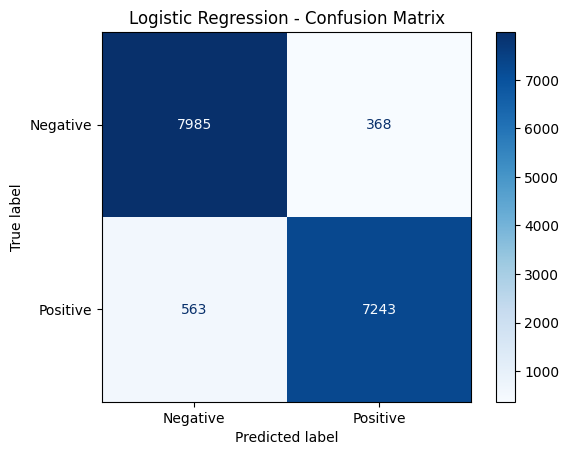

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Check unique classes in y_test and y_pred
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred_logistic))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# If there are only two classes (binary), update display labels accordingly
if len(set(y_test)) == 2:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


Saving the Logistic Regression Model

In [58]:
# Save the trained model to a .pkl file
joblib.dump(clf, 'logistic_regression_model.pkl')

# Save the vectorizer (optional)
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [49]:
from google.colab import files

# Download the saved model file
files.download('logistic_regression_model.pkl')
files.download('vectorizer.pkl')  # Optional if you want to download the vectorizer as well


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Using Random Forest Regressor for predicting continuous numerical values using stocks_yfinance_data dataset

In [35]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv('stock_yfinance_data.csv')

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature engineering: Use previous day's Close price as a feature
df['Prev Close'] = df['Close'].shift(1)

# Drop rows with missing values (e.g., first row due to shift)
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['Prev Close', 'Open', 'High', 'Low', 'Volume']]  # Previous day's Close and other numerical features
y = df['Close']  # Target is Close price

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_regressor = model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_regressor))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_regressor))
print("R2 Score:", r2_score(y_test, y_pred_regressor))


Mean Absolute Error: 1.719769482389329
Mean Squared Error: 7.835465217779199
R2 Score: 0.9995412762360182


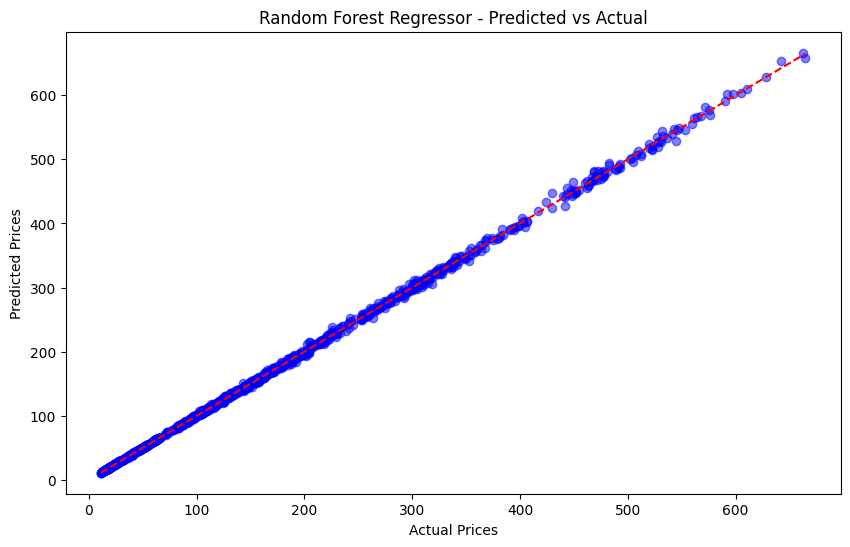

In [36]:
# Plotting Predicted vs Actual for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_regressor, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regressor - Predicted vs Actual')
plt.show()


In [50]:
# Save the trained model to a .pkl file
joblib.dump(clf, 'random_forest_regressor_model.pkl')

['random_forest_regressor_model.pkl']

Using Random Forest Classifier to classify stock price movements using stock_yfinance_data dataset

In [136]:
# Create a new column for stock price movement
df['Price Change'] = df['Close'].pct_change()  # Percentage change in stock price
df['Movement'] = np.where(df['Price Change'] > 0, 1, 0)  # 1 if price went up, 0 if price went down

# Drop missing values
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['Prev Close', 'Open', 'High', 'Low', 'Volume']]  # Features
y = df['Movement']  # Target is price movement (Up/Down)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_classifier = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_classifier))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classifier))
print(df)

Accuracy: 0.726984126984127

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       658
           1       0.72      0.69      0.71       602

    accuracy                           0.73      1260
   macro avg       0.73      0.73      0.73      1260
weighted avg       0.73      0.73      0.73      1260

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   
2021-10-07  261.820007  268.333344  261.126678  264.536682  264.536682   
2021-10-08  265.403320  265.459991  260.303345  261.829987  261.829987   
2021-10-11  262.549988  267.079987  261.833344  263.980011  263.980011   
...                ...         ...         ...         ...         ...   
2022-09-23   13.090000   13.

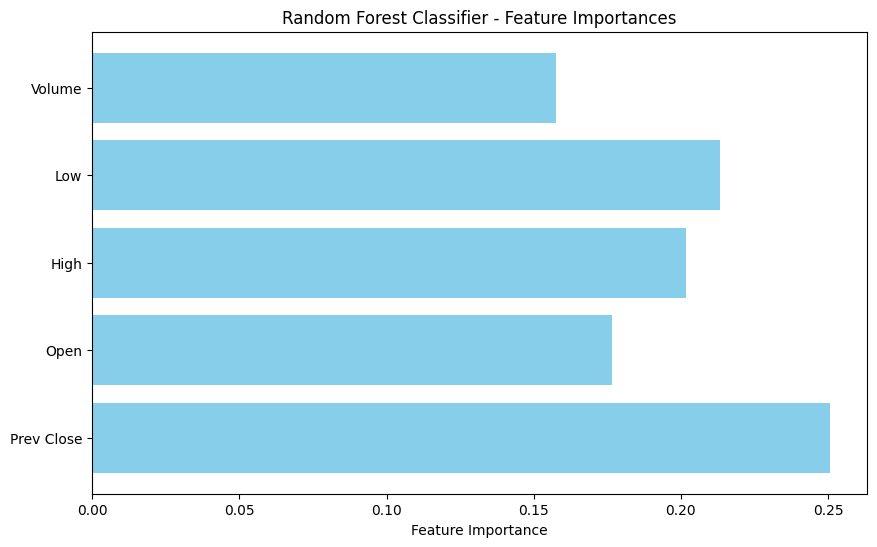

In [38]:
# Plotting Feature Importances for Random Forest Classifier
importances = model.feature_importances_  # model is your trained RandomForestClassifier
features = X.columns  # Feature names from the dataset

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importances')
plt.show()


In [51]:
# Save the trained model to a .pkl file
joblib.dump(clf, 'random_forest_classifier_model.pkl')

['random_forest_classifier_model.pkl']

Performing Stock Setiment analysis using the trained Logistic Regression model on stock subreddits

In [42]:
! pip install praw


  Using cached praw-7.8.1-py3-none-any.whl.metadata (9.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.5 MB/s eta 0:00:00


In [45]:
! pip install joblib

Testing on 'wallstreetbets' stock subreddit

In [119]:
import praw
import pandas as pd

# Set up Reddit API client
reddit = praw.Reddit(client_id='gX99J1VXpuMYCM6HaeOdsQ',
                     client_secret='ZD07K9X_rrSJQ-Z2VpHGmye37t3Hww',
                     user_agent='Reetu_Foodie')

# Scrape stock-related subreddit
subreddit = reddit.subreddit('wallstreetbets')  # Use your desired stock subreddit
posts = []

# Scrape top 5 posts from the subreddit (you can adjust limit)
for post in subreddit.hot(limit=100):
    posts.append({
        'title': post.title,
        'selftext': post.selftext,
        'score': post.score,
        'created': post.created
    })

# Convert the list of posts into a DataFrame
df_reddit = pd.DataFrame(posts)
print(df_reddit)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                                title  \
0     What Are Your Moves Tomorrow, December 02, 2024   
1                  Weekly Earnings thread 12/2 - 12/6   
2   Jacked to the tits on puts - If NASDAQ is red ...   
3                               4.5k > 92.6k 4 months   
4                              Stellantis CEO Resigns   
..                                                ...   
95  Since the market is closed, posting my Brisket...   
96               win some and lose some - rklb & achr   
97    What Are Your Moves Tomorrow, November 29, 2024   
98                                   Gm and good luck   
99  [$KMX] New car market is in for a kick in the ...   

                                             selftext  score       created  
0   This post contains content not supported on ol...    231  1.733087e+09  
1                                                        152  1.732899e+09  
2   [Positions](https://imgur.com/pKmUFi9) - Got i...   2434  1.733095e+09  
3      

In [120]:
import re

# Preprocess text (clean text for sentiment analysis)
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove @ mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

df_reddit['cleaned_text'] = df_reddit['title'] + ' ' + df_reddit['selftext']  # Combine title and body
df_reddit['cleaned_text'] = df_reddit['cleaned_text'].apply(clean_text)


In [121]:
import joblib

# Load pre-trained Logistic Regression model and vectorizer
logistic_model = joblib.load('logistic_regression_model.pkl')  # Pre-trained Logistic Regression model
vectorizer = joblib.load('vectorizer.pkl')  # Vectorizer used during model training


In [122]:
# Transform the cleaned text data using the same vectorizer
X_reddit = df_reddit['cleaned_text']
X_reddit_vectorized = vectorizer.transform(X_reddit)

# Predict sentiment (Positive or Negative)
df_reddit['sentiment'] = logistic_model.predict(X_reddit_vectorized)

# Print the first few rows to check the results
print(df_reddit.head())


                                               title  \
0    What Are Your Moves Tomorrow, December 02, 2024   
1                 Weekly Earnings thread 12/2 - 12/6   
2  Jacked to the tits on puts - If NASDAQ is red ...   
3                              4.5k > 92.6k 4 months   
4                             Stellantis CEO Resigns   

                                            selftext  score       created  \
0  This post contains content not supported on ol...    231  1.733087e+09   
1                                                       152  1.732899e+09   
2  [Positions](https://imgur.com/pKmUFi9) - Got i...   2434  1.733095e+09   
3                                     RKLB,RCAT,ACHR    922  1.733110e+09   
4                                                      1085  1.733082e+09   

                                        cleaned_text sentiment  
0  what are your moves tomorrow december 02 2024 ...  Positive  
1                   weekly earnings thread 122  126   Negative  
2  ja

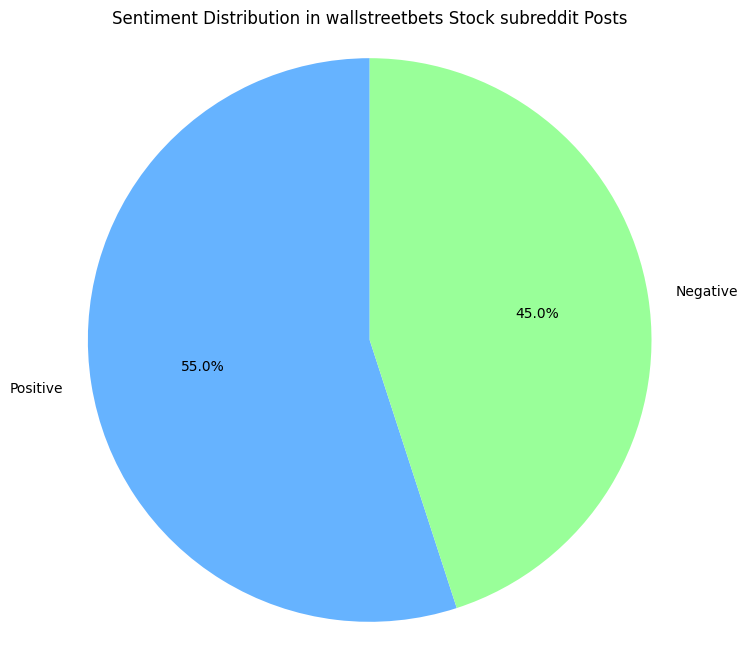

In [123]:
import matplotlib.pyplot as plt

# 1. Count the number of occurrences of each sentiment
sentiment_counts = df_reddit['sentiment'].value_counts()

# 2. Plot the distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution in wallstreetbets Stock subreddit Posts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Testing on 'stocks' subreddit

In [124]:
import praw
import pandas as pd

# Set up Reddit API client
reddit = praw.Reddit(client_id='gX99J1VXpuMYCM6HaeOdsQ',
                     client_secret='ZD07K9X_rrSJQ-Z2VpHGmye37t3Hww',
                     user_agent='Reetu_Foodie')

# Scrape stock-related subreddit
stocks_subreddit = reddit.subreddit('stocks')  # Use your desired stock subreddit
posts = []

# Scrape top 10 posts from the subreddit (you can adjust limit)
for post in stocks_subreddit.hot(limit=10):
    posts.append({
        'title': post.title,
        'selftext': post.selftext,
        'score': post.score,
        'created': post.created
    })

# Convert the list of posts into a DataFrame
stocks_df_reddit = pd.DataFrame(posts)
print(stocks_df_reddit)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                               title  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1  /r/Stocks Weekend Discussion Saturday - Nov 30...   
2  Is anyone else a little concerned about this m...   
3                 Stellantis CEO resignes (Is fired)   
4                    Seeking Alpha Black Friday Sale   
5          5 Health care stocks for the next 5 years   
6                         German market - Volkswagen   
7                        $CABA: Why I’m betting big!   
8  difference between splitting large companies b...   
9  Do you think Rivian would make it to $100 a sh...   

                                            selftext  score       created  
0  Please use this thread to discuss your portfol...      7  1.733047e+09  
1  This is the weekend edition of our stickied di...      9  1.732963e+09  
2  Listen, I get that it seems like clear skies a...    389  1.733077e+09  
3  STLA CEO Tavares resignes (is fired in other w...    188  1.733084e+09  
4  

In [125]:
import re

# Preprocess text (clean text for sentiment analysis)
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove @ mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

stocks_df_reddit['cleaned_text'] = stocks_df_reddit['title'] + ' ' + stocks_df_reddit['selftext']  # Combine title and body
stocks_df_reddit['cleaned_text'] = stocks_df_reddit['cleaned_text'].apply(clean_text)


In [126]:
# Transform the cleaned text data using the same vectorizer
X1_reddit = stocks_df_reddit['cleaned_text']
X1_reddit_vectorized = vectorizer.transform(X1_reddit)

# Predict sentiment (Positive or Negative)
stocks_df_reddit['sentiment'] = logistic_model.predict(X1_reddit_vectorized)

# Print the first few rows to check the results
print(stocks_df_reddit.head())


                                               title  \
0  Rate My Portfolio - r/Stocks Quarterly Thread ...   
1  /r/Stocks Weekend Discussion Saturday - Nov 30...   
2  Is anyone else a little concerned about this m...   
3                 Stellantis CEO resignes (Is fired)   
4                    Seeking Alpha Black Friday Sale   

                                            selftext  score       created  \
0  Please use this thread to discuss your portfol...      7  1.733047e+09   
1  This is the weekend edition of our stickied di...      9  1.732963e+09   
2  Listen, I get that it seems like clear skies a...    389  1.733077e+09   
3  STLA CEO Tavares resignes (is fired in other w...    188  1.733084e+09   
4  Is it just me, or does the Seeking Alpha Black...     60  1.733057e+09   

                                        cleaned_text sentiment  
0  rate my portfolio  rstocks quarterly thread de...  Positive  
1  rstocks weekend discussion saturday  nov 30 20...  Positive  
2  is

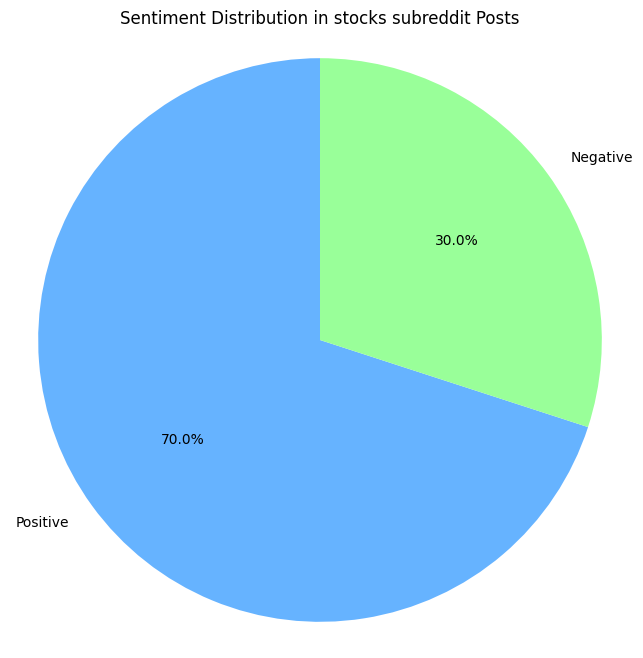

In [128]:
import matplotlib.pyplot as plt

# 1. Count the number of occurrences of each sentiment
sentiment1_counts = stocks_df_reddit['sentiment'].value_counts()

# 2. Plot the distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment1_counts, labels=sentiment1_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Sentiment Distribution in stocks subreddit Posts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
